In [1]:
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
import random
from time import sleep
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Bidirectional
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [2]:
dirA='./Datasets/setA/'
tempA=[]
for file in os.listdir(dirA):
    fl = dirA + file
    tempA.append(fl)
tempA = sorted(tempA)
dirE='./Datasets/setE/'
tempE=[]
for file in os.listdir(dirE):
    fl = dirE + file
    tempE.append(fl)
tempE = sorted(tempE)

In [3]:
tempA

['./Datasets/setA/Z001.txt',
 './Datasets/setA/Z002.txt',
 './Datasets/setA/Z003.txt',
 './Datasets/setA/Z004.txt',
 './Datasets/setA/Z005.txt',
 './Datasets/setA/Z006.txt',
 './Datasets/setA/Z007.txt',
 './Datasets/setA/Z008.txt',
 './Datasets/setA/Z009.txt',
 './Datasets/setA/Z010.txt',
 './Datasets/setA/Z011.txt',
 './Datasets/setA/Z012.txt',
 './Datasets/setA/Z013.txt',
 './Datasets/setA/Z014.txt',
 './Datasets/setA/Z015.txt',
 './Datasets/setA/Z016.txt',
 './Datasets/setA/Z017.txt',
 './Datasets/setA/Z018.txt',
 './Datasets/setA/Z019.txt',
 './Datasets/setA/Z020.txt',
 './Datasets/setA/Z021.txt',
 './Datasets/setA/Z022.txt',
 './Datasets/setA/Z023.txt',
 './Datasets/setA/Z024.txt',
 './Datasets/setA/Z025.txt',
 './Datasets/setA/Z026.txt',
 './Datasets/setA/Z027.txt',
 './Datasets/setA/Z028.txt',
 './Datasets/setA/Z029.txt',
 './Datasets/setA/Z030.txt',
 './Datasets/setA/Z031.txt',
 './Datasets/setA/Z032.txt',
 './Datasets/setA/Z033.txt',
 './Datasets/setA/Z034.txt',
 './Datasets/s

In [4]:
tempE

['./Datasets/setE/S001.txt',
 './Datasets/setE/S002.txt',
 './Datasets/setE/S003.txt',
 './Datasets/setE/S004.txt',
 './Datasets/setE/S005.txt',
 './Datasets/setE/S006.txt',
 './Datasets/setE/S007.txt',
 './Datasets/setE/S008.txt',
 './Datasets/setE/S009.txt',
 './Datasets/setE/S010.txt',
 './Datasets/setE/S011.txt',
 './Datasets/setE/S012.txt',
 './Datasets/setE/S013.txt',
 './Datasets/setE/S014.txt',
 './Datasets/setE/S015.txt',
 './Datasets/setE/S016.txt',
 './Datasets/setE/S017.txt',
 './Datasets/setE/S018.txt',
 './Datasets/setE/S019.txt',
 './Datasets/setE/S020.txt',
 './Datasets/setE/S021.txt',
 './Datasets/setE/S022.txt',
 './Datasets/setE/S023.txt',
 './Datasets/setE/S024.txt',
 './Datasets/setE/S025.txt',
 './Datasets/setE/S026.txt',
 './Datasets/setE/S027.txt',
 './Datasets/setE/S028.txt',
 './Datasets/setE/S029.txt',
 './Datasets/setE/S030.txt',
 './Datasets/setE/S031.txt',
 './Datasets/setE/S032.txt',
 './Datasets/setE/S033.txt',
 './Datasets/setE/S034.txt',
 './Datasets/s

In [5]:
ta=[]
st = 'A'
for i in range(len(tempA)):
    x = pd.read_table(tempA[i],header=None)
    x.columns=[st+str(i)]
    ta.append(x)
    
te=[]
st = 'A'
for i in range(len(tempE)):
    x = pd.read_table(tempE[i],header=None)
    x.columns=[st+str(i)]
    te.append(x)

In [6]:
ta

[      A0
 0     12
 1     22
 2     35
 3     45
 4     69
 ...   ..
 4092 -25
 4093 -28
 4094 -11
 4095   8
 4096  77
 
 [4097 rows x 1 columns],
        A1
 0     -56
 1     -50
 2     -64
 3     -91
 4    -135
 ...   ...
 4092 -172
 4093 -180
 4094 -173
 4095 -162
 4096  -82
 
 [4097 rows x 1 columns],
       A2
 0    -37
 1    -22
 2    -17
 3    -24
 4    -31
 ...   ..
 4092  -3
 4093   7
 4094   3
 4095   4
 4096  82
 
 [4097 rows x 1 columns],
       A3
 0    -31
 1    -43
 2    -39
 3    -39
 4     -9
 ...   ..
 4092  11
 4093  12
 4094  -6
 4095  10
 4096  33
 
 [4097 rows x 1 columns],
       A4
 0     14
 1     26
 2     32
 3     25
 4     16
 ...   ..
 4092 -55
 4093 -58
 4094 -32
 4095  -6
 4096 -17
 
 [4097 rows x 1 columns],
       A5
 0    -87
 1    -89
 2    -73
 3    -69
 4    -51
 ...   ..
 4092  32
 4093  37
 4094  18
 4095   7
 4096   7
 
 [4097 rows x 1 columns],
       A6
 0     -2
 1     20
 2     42
 3     48
 4     27
 ...   ..
 4092 -38
 4093 -23
 4094 -18


In [7]:
te

[       A0
 0     100
 1     124
 2     153
 3     185
 4     210
 ...   ...
 4092    7
 4093   26
 4094   57
 4095   95
 4096  462
 
 [4097 rows x 1 columns],
        A1
 0     340
 1     353
 2     400
 3     470
 4     538
 ...   ...
 4092  829
 4093  722
 4094  512
 4095  130
 4096  196
 
 [4097 rows x 1 columns],
        A2
 0    -310
 1      93
 2     494
 3     789
 4     798
 ...   ...
 4092 -735
 4093 -847
 4094 -721
 4095 -491
 4096  910
 
 [4097 rows x 1 columns],
        A3
 0      84
 1      75
 2      21
 3     -68
 4    -138
 ...   ...
 4092 -234
 4093 -238
 4094 -209
 4095 -165
 4096 -212
 
 [4097 rows x 1 columns],
        A4
 0     343
 1     311
 2     284
 3     274
 4     260
 ...   ...
 4092  515
 4093  527
 4094  480
 4095  397
 4096  217
 
 [4097 rows x 1 columns],
        A5
 0     -88
 1    -115
 2    -140
 3    -159
 4    -164
 ...   ...
 4092  153
 4093  150
 4094  146
 4095  140
 4096  191
 
 [4097 rows x 1 columns],
        A6
 0     176
 1     186
 2     

In [8]:
def table(table):
    big_table=None
    for tf in table:
        big_table=pd.concat([big_table,tf],axis=1)
    return big_table

In [9]:
bigA=table(ta)
bigE=table(te)

head=list(bigA.columns.values)

In [10]:
len(bigA.columns)

100

In [11]:
bigA

A0   A1  A2  A3  A4  A5  A6  A7  A8  A9  ...  A90  A91  A92  A93  A94   
0     12  -56 -37 -31  14 -87  -2 -31   8 -41  ...   13   40  -19  -45    6  \
1     22  -50 -22 -43  26 -89  20 -16  17 -38  ...   30   48   -1  -62   -6   
2     35  -64 -17 -39  32 -73  42  10  29 -31  ...   42   35   33  -76   -8   
3     45  -91 -24 -39  25 -69  48  28  46 -25  ...   56    5   51  -98   -6   
4     69 -135 -31  -9  16 -51  27  31  50 -32  ...   56  -40   49 -108   15   
...   ..  ...  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ...  ...  ...  ...   
4092 -25 -172  -3  11 -55  32 -38   0 -48  38  ...  -39  -40  -49   25   87   
4093 -28 -180   7  12 -58  37 -23   3 -50  22  ...  -39  -38  -71    9  103   
4094 -11 -173   3  -6 -32  18 -18   1 -40   1  ...  -36  -34  -70  -24   98   
4095   8 -162   4  10  -6   7  -6   1 -36 -13  ...  -22  -27  -25  -56   78   
4096  77  -82  82  33 -17   7 -37   0   7  -1  ...  -39  -42   -2   49   -5   

      A95  A96  A97  A98  A99  
0    -133   -3  -51   56  -36  
1    -144   -3  -42   55  -71  
2    -113  -12  -39   38 -120  
3     -74  -24  -47   -5 -150  
4     -41  -34  -51  -47 -160  
...   ...  ...  ...  ...  ...  
4092  -71   55   -9  -27   41  
4093  -79   42    2  -45   14  
4094  -83   30   -2  -32    3  
4095  -87   19    0   -4  -13  
4096 -104  -64  -49   69   30  

[4097 rows x 100 columns]

In [12]:
def creat_mat(mat):
    matx = np.zeros((len(mat),(len(head))))
    for i in range(len(head)):
        matx[:,i] = mat[head[i]]
        sleep(0.01)
    return matx

In [13]:
matA=creat_mat(bigA)
matE=creat_mat(bigE)

In [14]:
matA=np.nan_to_num(matA)
matE=np.nan_to_num(matE)

In [15]:
matA.shape,matE.shape

((4097, 100), (4097, 100))

In [16]:
matA

array([[  12.,  -56.,  -37., ...,  -51.,   56.,  -36.],
       [  22.,  -50.,  -22., ...,  -42.,   55.,  -71.],
       [  35.,  -64.,  -17., ...,  -39.,   38., -120.],
       ...,
       [ -11., -173.,    3., ...,   -2.,  -32.,    3.],
       [   8., -162.,    4., ...,    0.,   -4.,  -13.],
       [  77.,  -82.,   82., ...,  -49.,   69.,   30.]])

In [17]:
matE

array([[ 100.,  340., -310., ..., -438., -476.,   23.],
       [ 124.,  353.,   93., ..., -561., -518.,  144.],
       [ 153.,  400.,  494., ..., -622., -521.,  228.],
       ...,
       [  57.,  512., -721., ..., -118.,  246., -155.],
       [  95.,  130., -491., ..., -163.,  556.,    6.],
       [ 462.,  196.,  910., ...,  -56.,  276., -221.]])

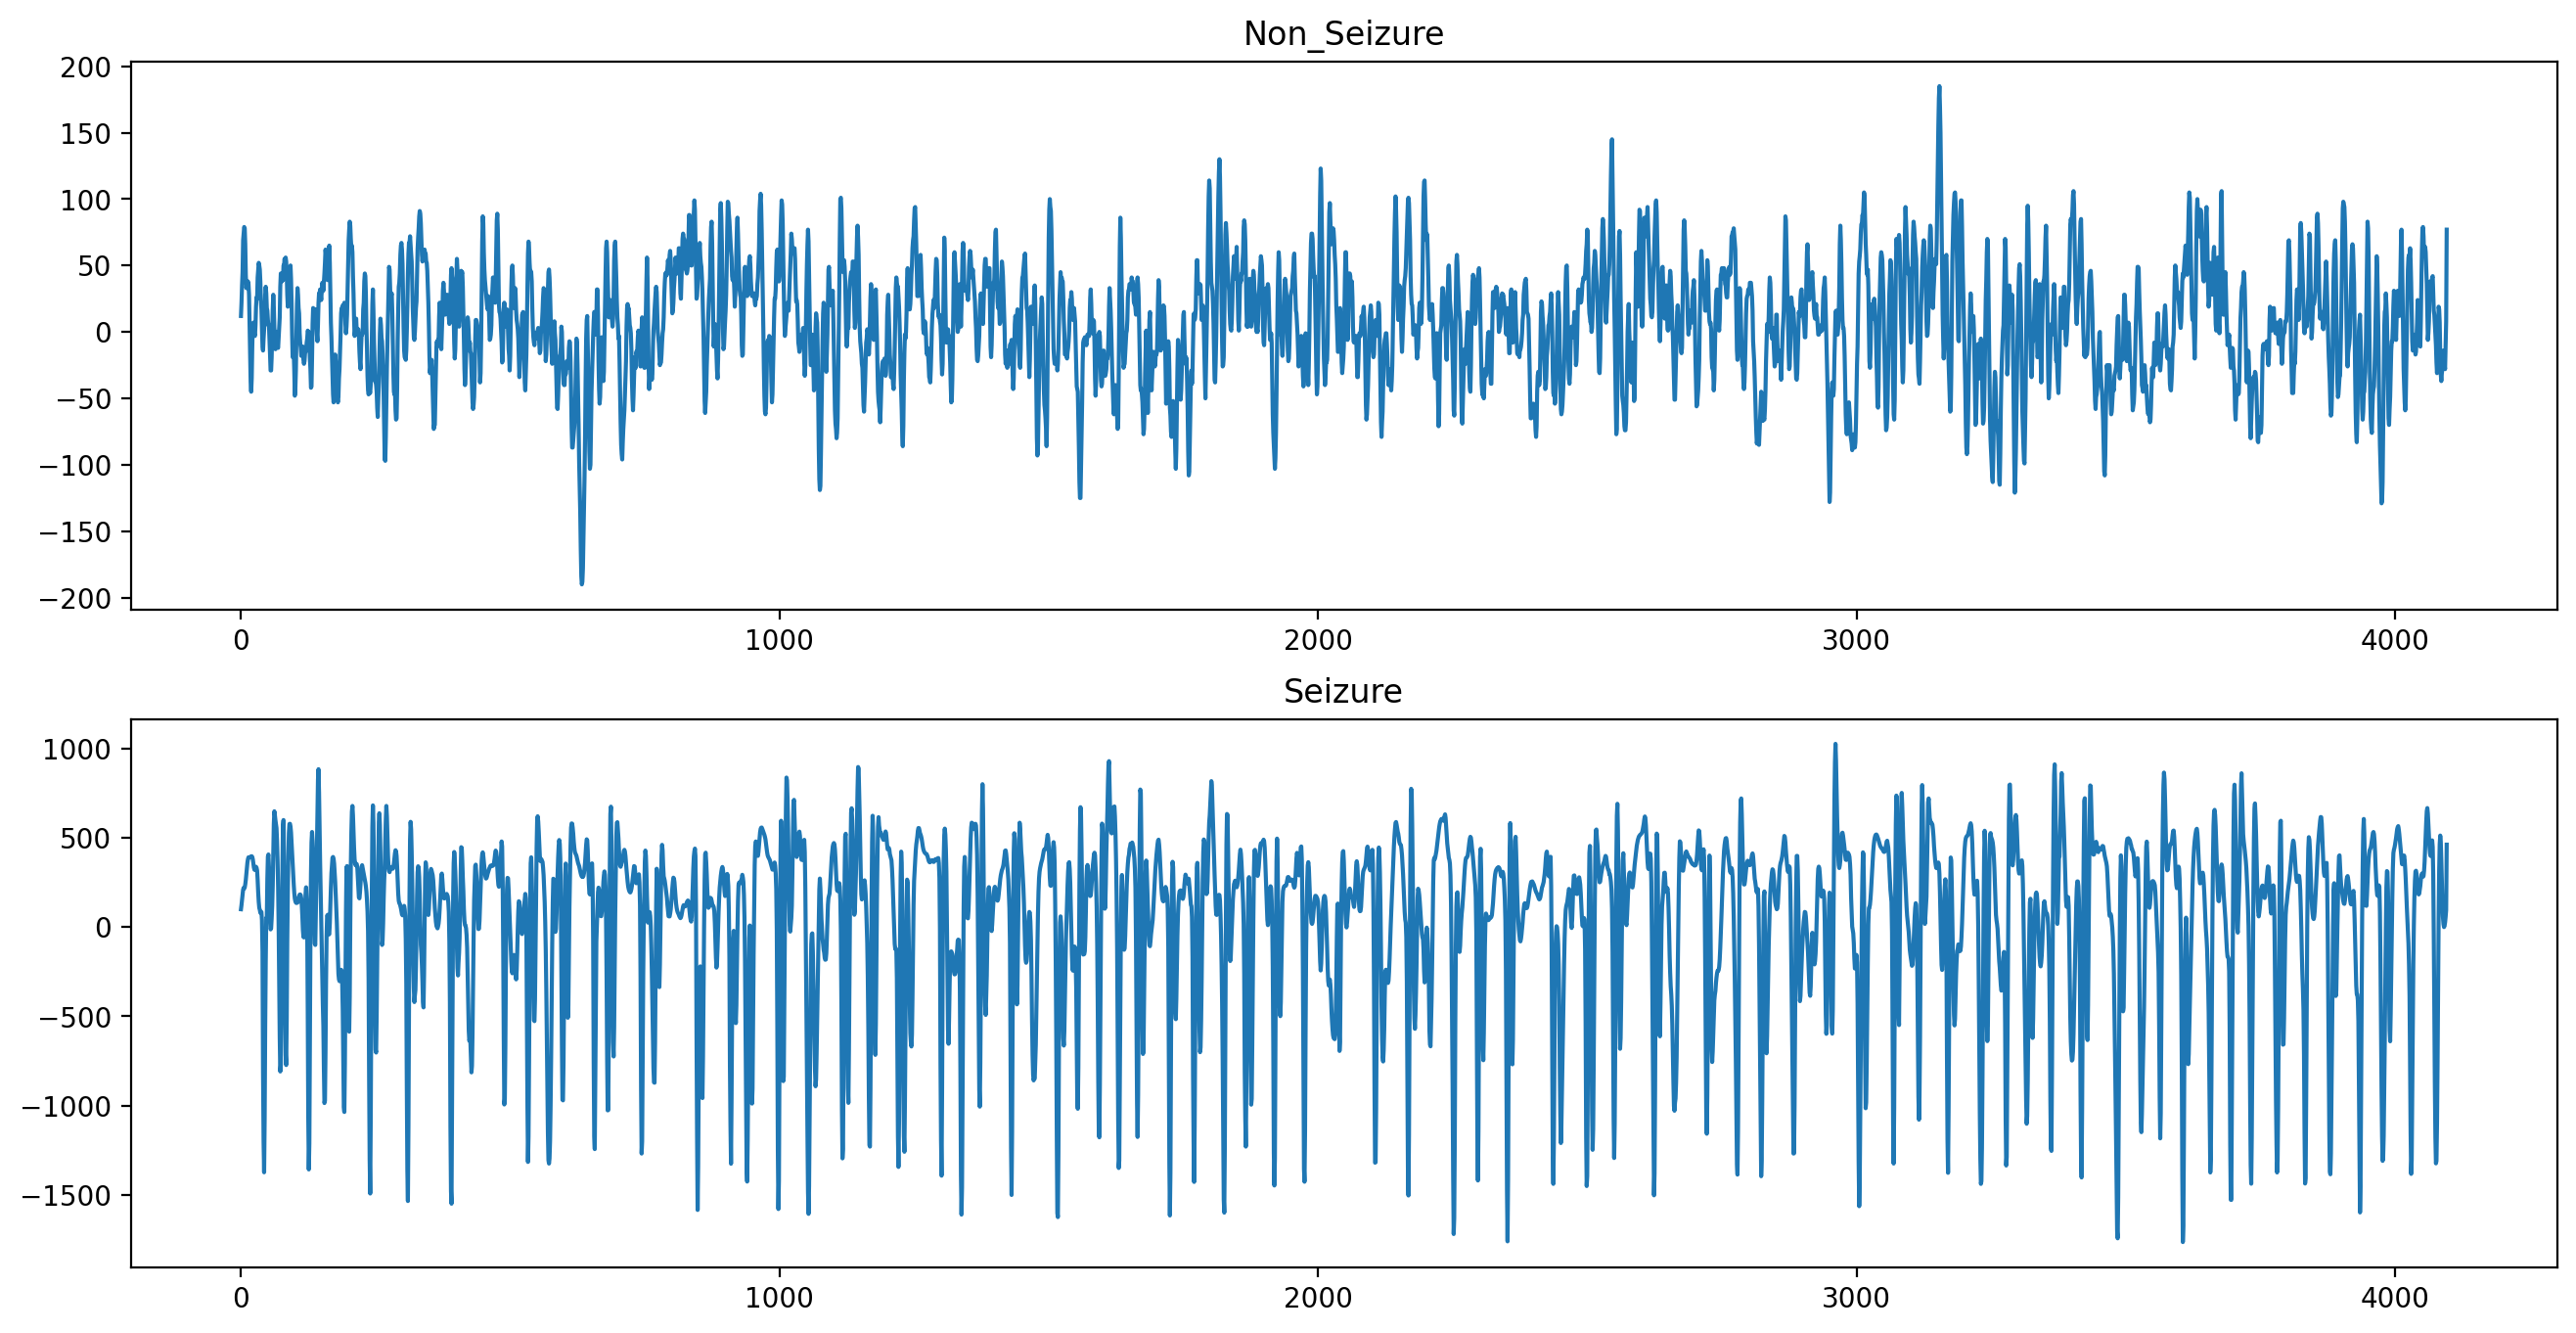

In [18]:
samples=np.arange(0,4097,1)
plt.figure(figsize=(16,8),dpi=200)
plt.subplot(2,1,1)
plt.title('Non_Seizure')
plt.plot(samples,matA[:,0],label='Non_Seizure')
plt.subplot(2,1,2)
plt.title('Seizure')
plt.plot(samples,matE[:,0],label='Seizure')
plt.show()

In [19]:
feature_size = 8
columns_name = list()
for i in range(feature_size):
    columns_name = columns_name + ['f'+str(i+1)]
columns_name = columns_name + ['class']

In [20]:
def features(mat):
  Fs   = 173
  fft = np.fft.fft(mat)
  mat = np.fft.ifft(fft[0:1500])
  mat = abs(np.fft.ifft(fft[0:1000]))
  lis = list()
  lis = lis + [np.max(abs(fft))]
  lis = lis + [np.min(abs(fft))]
  lis = lis + [np.mean(abs(fft))]
  lis = lis + [np.std(abs(fft))]
  lis = lis + [np.max(mat)]
  lis = lis + [np.min(mat)]
  lis = lis + [np.mean(mat)]
  lis = lis + [np.std(mat)]
  sleep(0.01)
             
  return lis

In [21]:
MftA = np.zeros((100,feature_size + 1))
for i in range(100):
    MftA[i,:] = features(matA[:,i]) + [1]

In [22]:
MftE = np.zeros((100,feature_size + 1))
for i in range(100):
    MftE[i,:] = features(matE[:,i]) + [0]

In [23]:
len(MftA),len(MftE)

(100, 100)

In [24]:
FCM_A = pd.DataFrame(MftA,columns=columns_name)
FCM_E = pd.DataFrame(MftE,columns=columns_name)

In [25]:
TotalDataset = pd.concat([FCM_A,FCM_E],ignore_index=True)

In [26]:
TotalDataset

f1         f2            f3            f4           f5   
0     27927.000000   1.804001   1306.891142   2431.919518   402.671072  \
1    214866.000000   3.676425   1671.932564   4270.252159   608.727553   
2     52053.000000   1.686932   1449.913086   2768.612115   417.530621   
3     17599.744070  16.933319   1773.067008   2449.424909   385.370119   
4     73743.000000   7.626801   1430.247438   2746.877731   435.671590   
..             ...        ...           ...           ...          ...   
195  182731.000000   4.140197   2964.034370   6900.671072   949.526909   
196  405933.567827  23.829796  12451.110052  33118.177387  3365.057684   
197  206553.768555  13.807308   7000.972903  17431.403312  1554.877011   
198  186015.216714  22.248840  12069.225734  21179.101425  3292.508700   
199  128700.862108  12.661965   6980.974726  15056.067510  2296.802283   

             f6           f7          f8  class  
0      4.683998   111.494796   59.500225    1.0  
1     27.437399   239.483060   93.593039    1.0  
2      3.368915   128.570237   69.166958    1.0  
3      2.077735   119.681376   65.604141    1.0  
4      5.824369   132.431131   68.939573    1.0  
..          ...          ...         ...    ...  
195    7.628541   321.787517  169.284739    0.0  
196  584.042975  1497.708540  566.344367    0.0  
197   70.801519   785.302431  325.527149    0.0  
198   22.389188   897.583539  643.899324    0.0  
199   30.885310   673.746341  331.607715    0.0  

[200 rows x 9 columns]

In [27]:
x = TotalDataset[columns_name[:-1]]
y = TotalDataset[['class']]
x = np.asarray(x)
y = np.asarray(y)

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [29]:
st_x= StandardScaler()  
x_train= st_x.fit_transform(x_train) 

In [30]:
x_test= st_x.transform(x_test)

In [31]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 8)
(40, 8)
(160, 1)
(40, 1)


In [32]:
x_train=x_train.reshape(x_train.shape[0],8,1)
y_train=y_train.reshape(y_train.shape[0],1)
x_test=x_test.reshape(x_test.shape[0],8,1)
y_test=y_test.reshape(y_test.shape[0],1)

In [33]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 8, 1)
(40, 8, 1)
(160, 1)
(40, 1)


In [34]:
batch_size=20
nb_epoch=200
hidden_size=64
use_dropout=True

model=Sequential()
model.add(Bidirectional(LSTM(hidden_size,input_shape=(8,1))))

if use_dropout:
    model.add(Dropout(0.50))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])


history=model.fit(x_train,y_train,validation_split=0,batch_size=batch_size,epochs=nb_epoch)
score=model.evaluate(x_test,y_test,batch_size=batch_size)
y_pred=model.predict(x_test).round()

Epoch 1/200
8/8 [==============================] - 4s 6ms/step - loss: 0.6370 - acc: 0.7188
Epoch 2/200
8/8 [==============================] - 0s 4ms/step - loss: 0.5137 - acc: 0.8750
Epoch 3/200
8/8 [==============================] - 0s 4ms/step - loss: 0.4167 - acc: 0.8813
Epoch 4/200
8/8 [==============================] - 0s 3ms/step - loss: 0.3284 - acc: 0.8813
Epoch 5/200
8/8 [==============================] - 0s 3ms/step - loss: 0.2595 - acc: 0.8938
Epoch 6/200
8/8 [==============================] - 0s 3ms/step - loss: 0.2042 - acc: 0.9000
Epoch 7/200
8/8 [==============================] - 0s 2ms/step - loss: 0.1655 - acc: 0.9187
Epoch 8/200
8/8 [==============================] - 0s 3ms/step - loss: 0.1407 - acc: 0.9375
Epoch 9/200
8/8 [==============================] - 0s 3ms/step - loss: 0.1170 - acc: 0.9688
Epoch 10/200
8/8 [==============================] - 0s 3ms/step - loss: 0.1034 - acc: 0.9750
Epoch 11/200
8/8 [==============================] - 0s 3ms/step - loss: 0.0872 

8/8 [==============================] - 0s 3ms/step - loss: 5.8932e-04 - acc: 1.0000
Epoch 89/200
8/8 [==============================] - 0s 2ms/step - loss: 4.5451e-04 - acc: 1.0000
Epoch 90/200
8/8 [==============================] - 0s 3ms/step - loss: 6.6621e-04 - acc: 1.0000
Epoch 91/200
8/8 [==============================] - 0s 3ms/step - loss: 3.6236e-04 - acc: 1.0000
Epoch 92/200
8/8 [==============================] - 0s 3ms/step - loss: 5.3865e-04 - acc: 1.0000
Epoch 93/200
8/8 [==============================] - 0s 2ms/step - loss: 4.6082e-04 - acc: 1.0000
Epoch 94/200
8/8 [==============================] - 0s 3ms/step - loss: 3.7281e-04 - acc: 1.0000
Epoch 95/200
8/8 [==============================] - 0s 3ms/step - loss: 5.7003e-04 - acc: 1.0000
Epoch 96/200
8/8 [==============================] - 0s 3ms/step - loss: 5.8370e-04 - acc: 1.0000
Epoch 97/200
8/8 [==============================] - 0s 3ms/step - loss: 0.0015 - acc: 1.0000
Epoch 98/200
8/8 [=============================

8/8 [==============================] - 0s 3ms/step - loss: 1.5221e-04 - acc: 1.0000
Epoch 172/200
8/8 [==============================] - 0s 3ms/step - loss: 2.2462e-04 - acc: 1.0000
Epoch 173/200
8/8 [==============================] - 0s 3ms/step - loss: 3.7972e-04 - acc: 1.0000
Epoch 174/200
8/8 [==============================] - 0s 3ms/step - loss: 2.0864e-04 - acc: 1.0000
Epoch 175/200
8/8 [==============================] - 0s 3ms/step - loss: 1.4336e-04 - acc: 1.0000
Epoch 176/200
8/8 [==============================] - 0s 3ms/step - loss: 2.4425e-04 - acc: 1.0000
Epoch 177/200
8/8 [==============================] - 0s 3ms/step - loss: 1.3300e-04 - acc: 1.0000
Epoch 178/200
8/8 [==============================] - 0s 2ms/step - loss: 3.0596e-04 - acc: 1.0000
Epoch 179/200
8/8 [==============================] - 0s 3ms/step - loss: 1.8371e-04 - acc: 1.0000
Epoch 180/200
8/8 [==============================] - 0s 3ms/step - loss: 1.0886e-04 - acc: 1.0000
Epoch 181/200
8/8 [===============

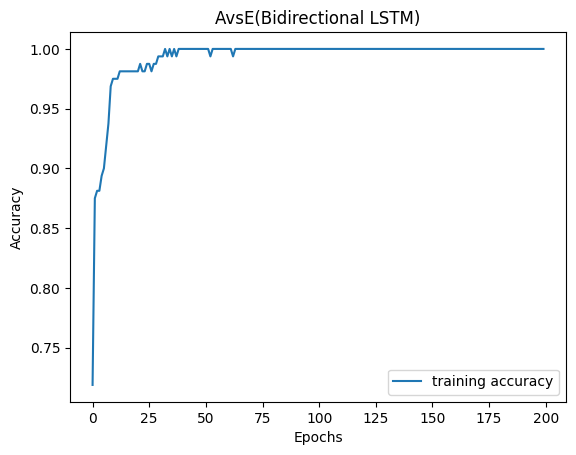

In [35]:
plt.plot(history.history['acc'], label='training accuracy')
plt.title('AvsE(Bidirectional LSTM)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('2-AvsE(Bidirectional LSTM)_Accuracy.png')
plt.show()

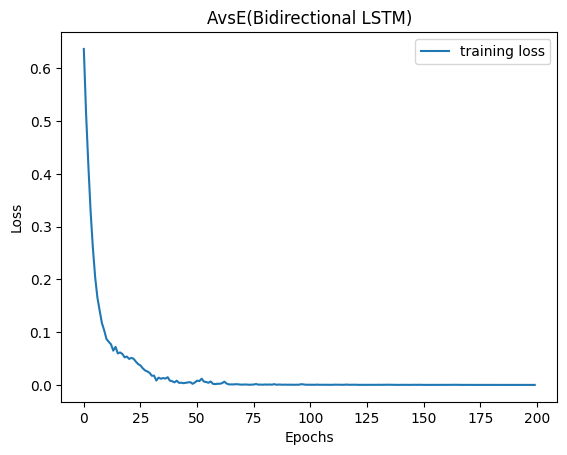

In [36]:
plt.plot(history.history['loss'], label='training loss')
plt.title('AvsE(Bidirectional LSTM)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('2-AvsE(Bidirectional LSTM)_Loss.png')
plt.show()

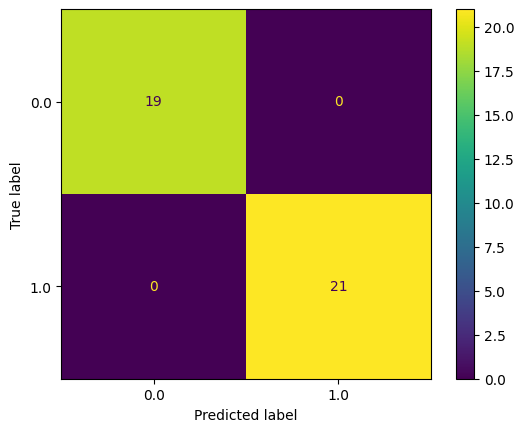

In [37]:
actual=y_test
predicted=y_pred
onfusion_matrix = metrics.confusion_matrix(actual, predicted)
ConfusionMatrixDisplay.from_predictions( y_test, y_pred)
plt.savefig('2-AvsE(Bidirectional LSTM)_confusionMatrix.png')
plt.show()

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        19
         1.0       1.00      1.00      1.00        21

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

